# Домашнее задание 5. Градиентный спуск. (10 баллов + 2.5 бонус)

В этом домашнем задании вы напишете градиентный спуск для линейной регрессии, а так же посмотрите, как он ведёт себя с разными параметрами и разными функциями потерь.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

In [492]:
from typing import Iterable, List

import matplotlib.pyplot as plt
import numpy as np

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели, его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его не нужно. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

In [493]:
import abc


class BaseLoss(abc.ABC):
    """Базовый класс лосса"""

    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактоного класса: Mean Squared Error лосс.

### **Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`

Он должен вычислять лосс и градиент по формулам наверху

Mean Squared Error в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

Градиент нашего функционала:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

In [494]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """

        # Просто перепишем формулу в функцию
        # Считаем скалярное произведение
        dot_product = np.dot(X, w)
        # Вычитаем из получившегося вектора вектор ответов
        dot_product -= y
        # Считаем норму вектора и возводим ее в квадрат
        dot_norm = np.linalg.norm(dot_product) ** 2
        # Делим результат на l (где l - количество объектов в выборке)
        dot_norm /= y.size
        return dot_norm

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """

        # Опять же просто перепишем формулу в функцию
        # Считаем скалярное произведение
        dot_product =  np.dot(X, w)
        # Вычитаем из получившегося вектора вектор ответов
        dot_product -= y
        # Берем скалярное произведение то транспонированной матрицы признаков и
        # предыдущего результата
        result = np.dot(X.T, dot_product)
        # Умножаем результат на 2 / l (где l - количество объектов в выборке)
        result = 2.0 / y.size * result
        return result

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [495]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(
    loss.calc_grad(X, y, w),
    np.array(
        [
            1163180.0,
            1172281.0,
            1181382.0,
            1190483.0,
            1199584.0,
            1208685.0,
            1217786.0,
            1226887.0,
            1235988.0,
            1245089.0,
        ]
    ),
), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

### **Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`,
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать
траекторию спуска (список из новых значений весов на каждом шаге)

In [496]:
def gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    n_iterations: int = 100000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """

    # У нас есть формула, применим ее
    # Изначально для удобства добавим начальный вектор весов для удобства
    result = [w_init]

    # Идем по итерациям
    for current_iteration in range(n_iterations):

        # Считаем текущий градиент, взяв предыдущие веса (они последние в нашем
        # массиве результатов)
        current_gradient = loss.calc_grad(X, y, result[-1])
        # Умножаем градиент на длину шага
        current_gradient = lr * current_gradient

        # В массив результатов записываем результат (предыдущие веса минус то, что
        # мы получили)
        result.append(result[-1] - current_gradient)

    # Возвращаем массив ответов, убрав оттуда изначальные веса, чтобы в результате
    # получился список из n_iterations объектов
    return result[1:]

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [497]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [498]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

155.26258214351938
0.8670644395649494


In [499]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r"$w_1$")
    plt.ylabel(r"$w_2$")
    plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect("equal")

    # visualize the level set
    CS = plt.contour(
        A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
    )
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

Протестируем, какой график получается для тестовых данных из этого задания. Он хороший)

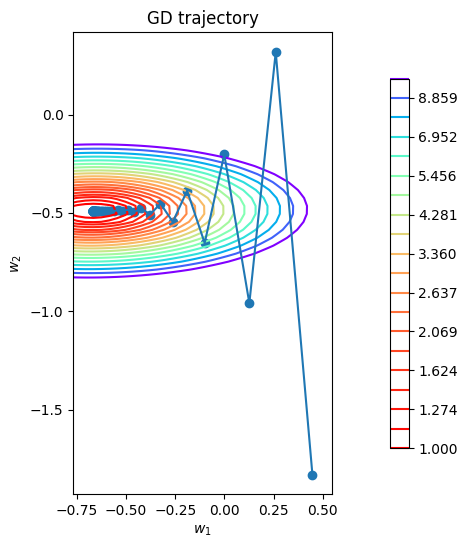

In [500]:
plot_gd(w_list, X, y, loss)

### **Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте не менее четырёх разных значений для `lr`.

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1


----------------------  step = 0.0001 ----------------------
First iteration loss: 412.535493229334
Last iteration loss: 27.07913862609387



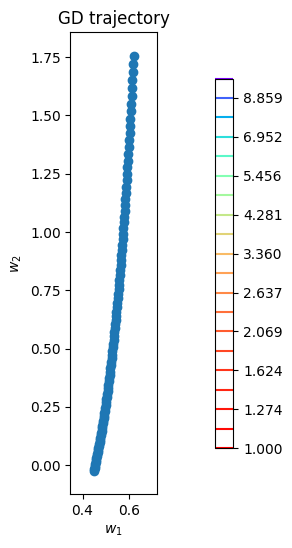


----------------------  step = 0.0004 ----------------------
First iteration loss: 374.6290385800167
Last iteration loss: 4.686030545500859



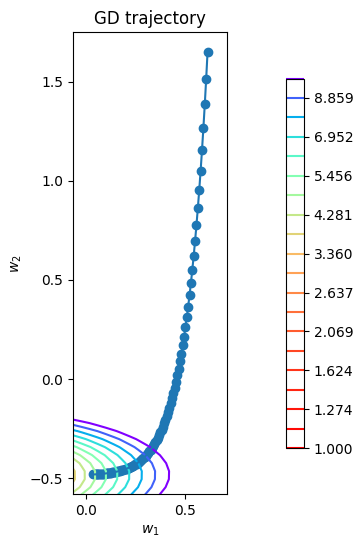


----------------------  step = 0.0016 ----------------------
First iteration loss: 241.8221611255826
Last iteration loss: 0.9567716126790974



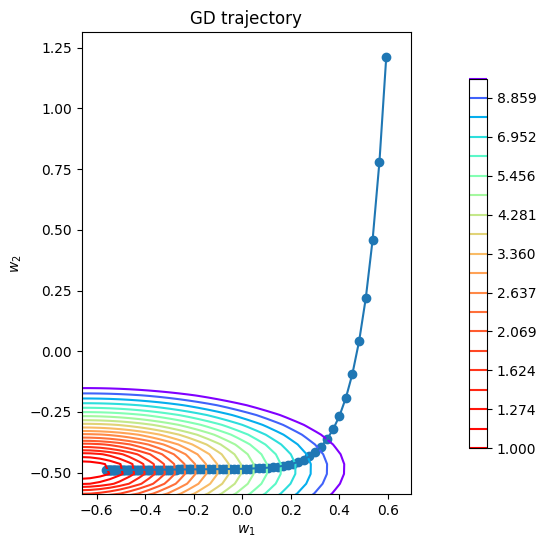


----------------------  step = 0.0064 ----------------------
First iteration loss: 11.697709593194558
Last iteration loss: 0.8670644525317386



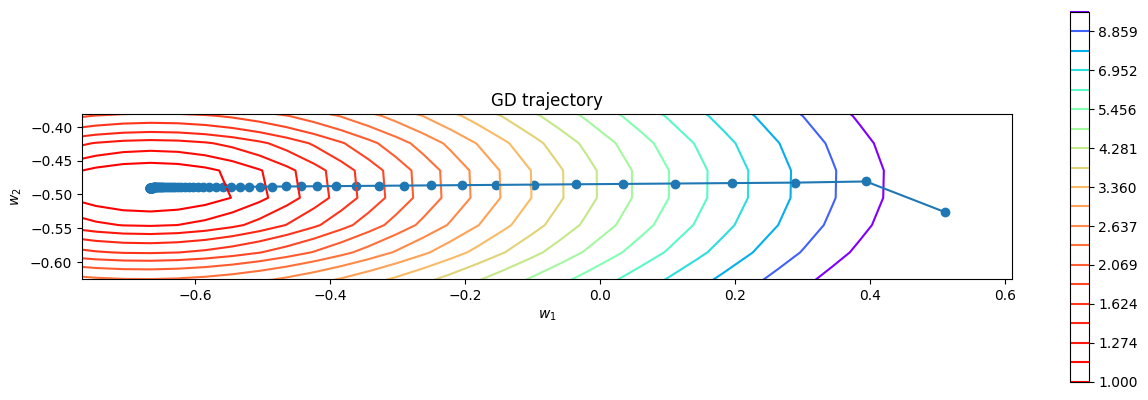


----------------------  step = 0.0256 ----------------------
First iteration loss: 3908.848836029217
Last iteration loss: 2.037182887999797e+100



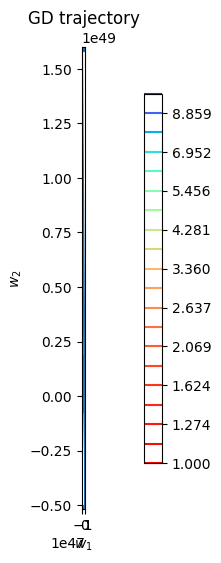

In [501]:
# как начальное значение возьмем 0.0001
lr = 0.0001
loss = MSELoss()

# По заданию хорошие значения лежат в промежутке до 0.1, так и сделаем
while lr < 0.1:

    # Красивый вывод
    print(f"\n----------------------  step = {lr} ----------------------")
    # Считаем веса для итераций
    w_list = gradient_descent(w_init, X, y, loss, lr, 100)
    # Выводим ошибку для первого элемента
    print("First iteration loss: " + str(loss.calc_loss(X, y, w_list[0])))
    # И для последнего (понятное дело, что для последнего должна быть лучше,
    # а если все хорошо, то вообще - почти самой лучшей)
    print("Last iteration loss: " + str(loss.calc_loss(X, y, w_list[-1])) + "\n")
    # Строим график
    plot_gd(w_list, X, y, loss)

    # Умножаем длину шага на 4 => и шагов у нас получится 5, и их значения будут
    # нескучными и не равномерными (то есть сможем увидеть интересные результаты)
    lr *= 4

Как можно увидеть (и как мы знаем...) от параметра lr - длины шага зависит очень многое: количество шагов, требующихся для получения хорошего результата; приведет ли вообще наш градиентный спуск к хорошему результату или перепрыгнет его и т.д.

Из наших результатов видно, что длины шага 0.0001 и 0.0004 слишком малы, чтобы получить хорошее значение ошибки, за 100 итераций они не успевают этого сделать. Хотя и явно видно, что при 0.0001 минимальная ошибка = 27.07913862609387, а при 0.0004 уже гораздо меньше (4.686030545500859).

Также это видно и по графику, 0.0001 совсем не успевает дойти до адекватных ошибок (цветных окружностей), а 0.0004 только на итерациях ближе к концу доходит до туда.

То же самое поведение и при шаге в 0.0016, а вот при 0.0064 уже ситуация гораздо лучше, эта длина ближе к оптимальной для наших данных и поэтому самая хорошая ошибка в нашей выборке шагов именно при lr = 0.0064 (0.8670644525317386). График тут тоже хороший - с каждым шагом все ближе и ближе к лучшему значению вектора весов.



При lr = 0.0256 ошибка улетает в космос (2 * 10^100). Соответственно шаг был взят слишком большой и gradient descent перепрыгивает хорошие значения вектора весов. Даже график нам не строится адекватно.



Теперь реализуем стохастический градиентный спуск

### **Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча.

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [502]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    # У нас есть формула, применим ее
    # Изначально для удобства добавим начальный вектор весов для удобства
    result = [w_init]

    # Идем по итерациям
    for current_iteration in range(n_iterations):

        # Вычисляем случаные индексы
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        batch_x = X[batch_indices]
        batch_y = y[batch_indices]

        # Считаем текущий градиент, взяв предыдущие веса (они последние в нашем
        # массиве результатов) и в берем не всю выборку, а только случайно взятые
        # объекты
        current_gradient = loss.calc_grad(batch_x, batch_y, result[-1])
        # Умножаем градиент на длину шага
        current_gradient *= lr

        # В массив результатов записываем результат (предыдущие веса - то, что
        # мы получили)
        result.append(result[-1] - current_gradient)

    # Возвращаем массив ответов, убрав оттуда изначальные веса, чтобы в результате
    # получился список из n_iterations объектов
    return result[1:]

### **Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`.

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.


--------------  step = 0.0001 / batch_size = 5 --------------
First iteration loss: 413.20678148106697
Last iteration loss: 28.61328150089795



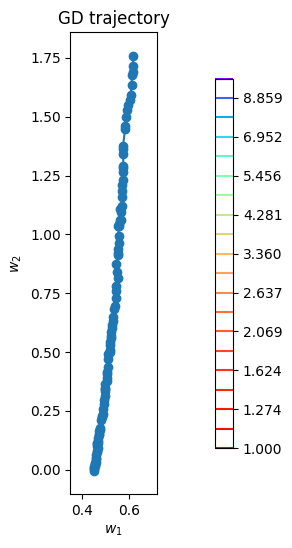


--------------  step = 0.0001 / batch_size = 10 --------------
First iteration loss: 405.61606893933254
Last iteration loss: 24.245095829647536



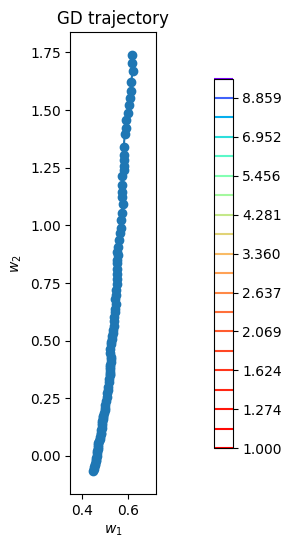


--------------  step = 0.0001 / batch_size = 50 --------------
First iteration loss: 412.97021047960334
Last iteration loss: 26.16563782298427



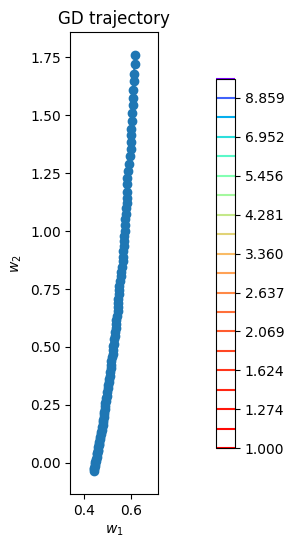


--------------  step = 0.0001 / batch_size = 150 --------------
First iteration loss: 412.47177039885077
Last iteration loss: 27.092369564516364



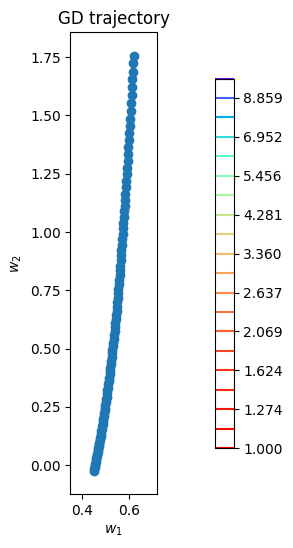


--------------  step = 0.0001 / batch_size = 300 --------------
First iteration loss: 412.53549322933384
Last iteration loss: 27.07913862609387



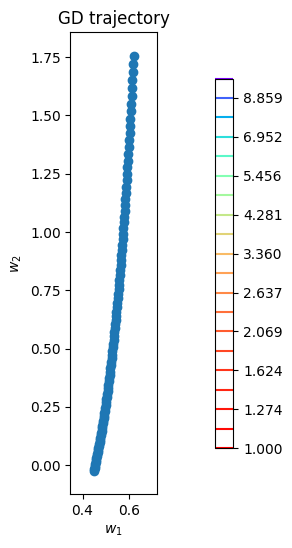


--------------  step = 0.0004 / batch_size = 5 --------------
First iteration loss: 360.6904576178626
Last iteration loss: 5.020206925441419



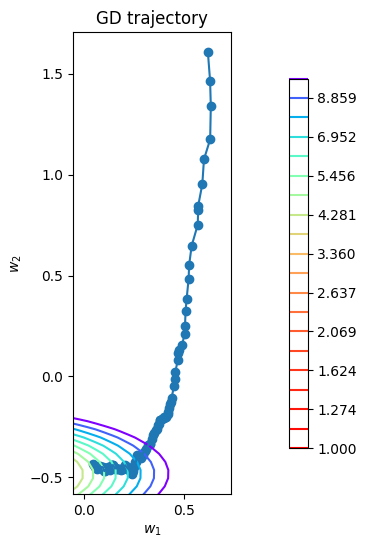


--------------  step = 0.0004 / batch_size = 10 --------------
First iteration loss: 357.3751500567993
Last iteration loss: 4.429822278222558



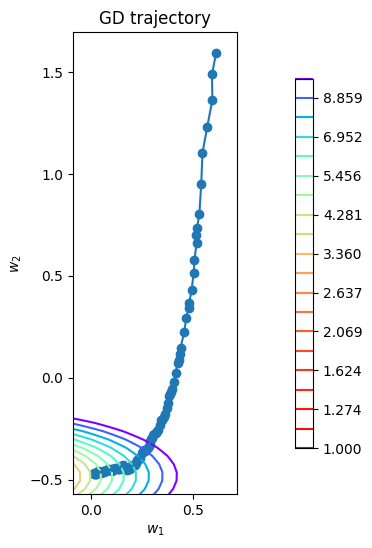


--------------  step = 0.0004 / batch_size = 50 --------------
First iteration loss: 371.56359297351776
Last iteration loss: 4.701396102354867



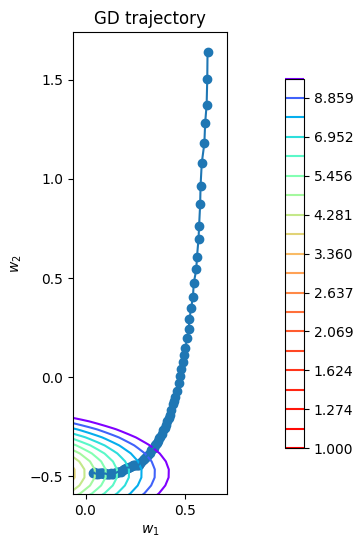


--------------  step = 0.0004 / batch_size = 150 --------------
First iteration loss: 373.44947502283577
Last iteration loss: 4.752459220767867



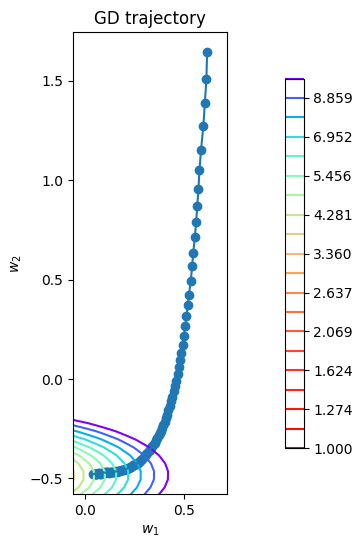


--------------  step = 0.0004 / batch_size = 300 --------------
First iteration loss: 374.6290385800167
Last iteration loss: 4.686030545500859



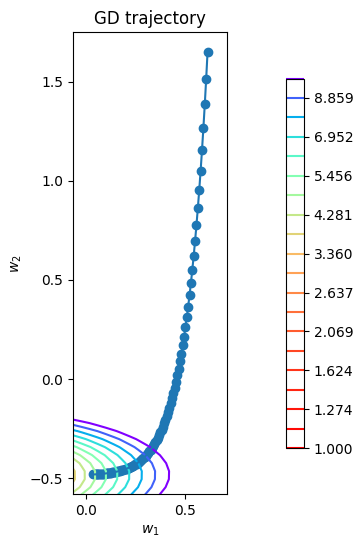


--------------  step = 0.0016 / batch_size = 5 --------------
First iteration loss: 215.24343441626755
Last iteration loss: 0.9764277542901247



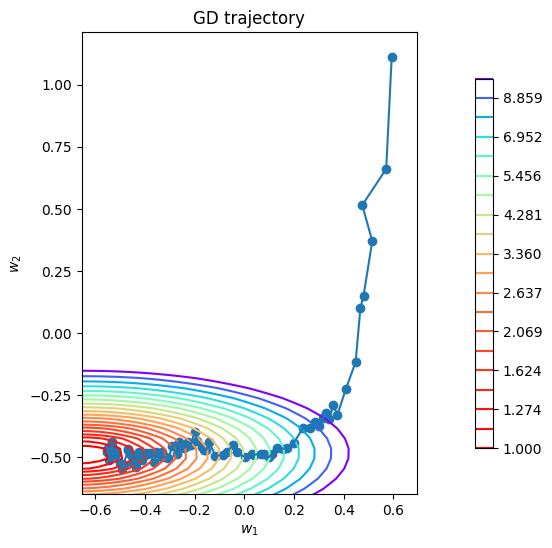


--------------  step = 0.0016 / batch_size = 10 --------------
First iteration loss: 288.0896445484948
Last iteration loss: 0.9472616231847015



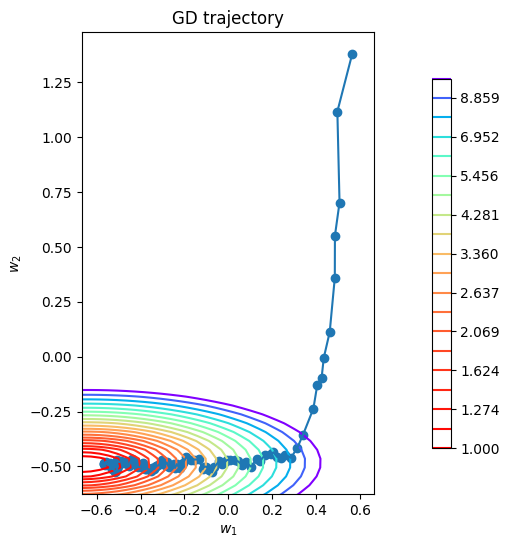


--------------  step = 0.0016 / batch_size = 50 --------------
First iteration loss: 234.83720979490099
Last iteration loss: 0.9674087789734857



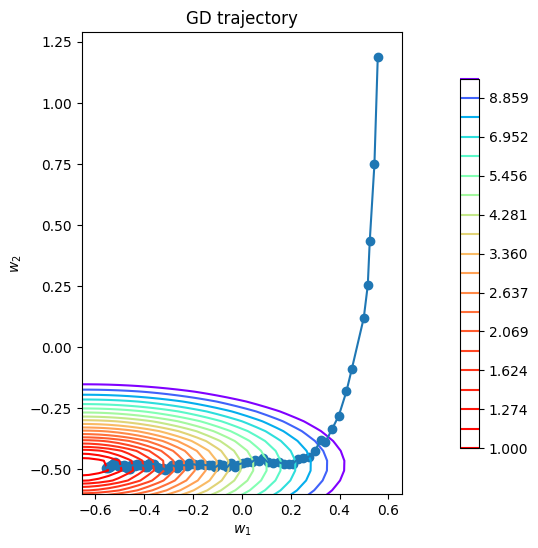


--------------  step = 0.0016 / batch_size = 150 --------------
First iteration loss: 238.76196125452523
Last iteration loss: 0.9618022914831361



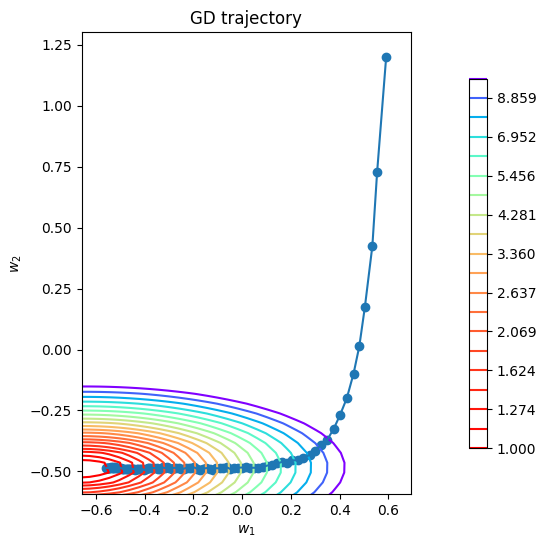


--------------  step = 0.0016 / batch_size = 300 --------------
First iteration loss: 241.8221611255825
Last iteration loss: 0.9567716126790974



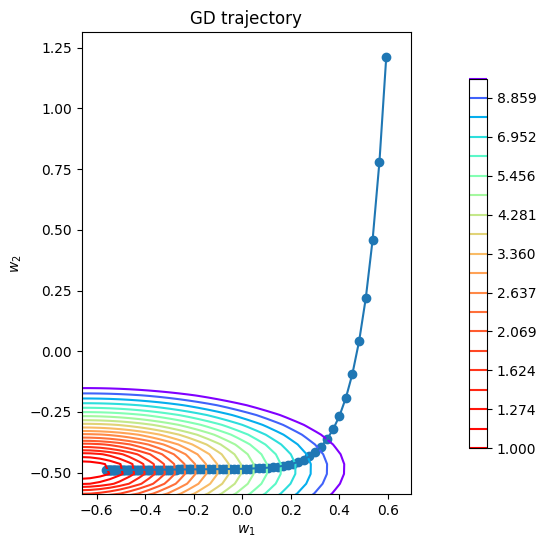


--------------  step = 0.0064 / batch_size = 5 --------------
First iteration loss: 96.35124295550007
Last iteration loss: 1.3587119563059402



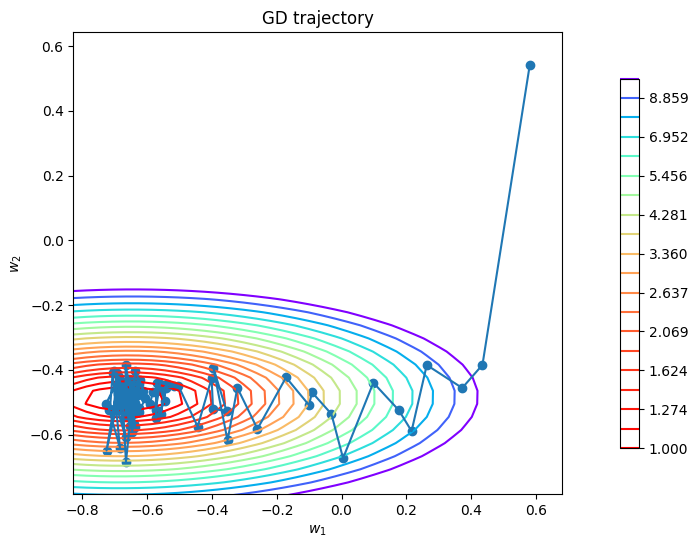


--------------  step = 0.0064 / batch_size = 10 --------------
First iteration loss: 23.071910922440438
Last iteration loss: 0.9663494205414167



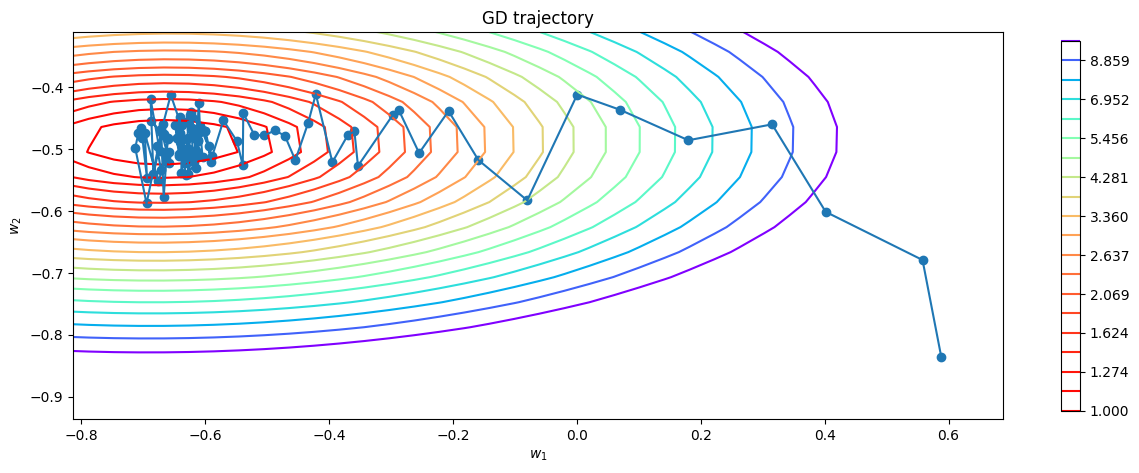


--------------  step = 0.0064 / batch_size = 50 --------------
First iteration loss: 18.831568639741043
Last iteration loss: 0.8753629414216583



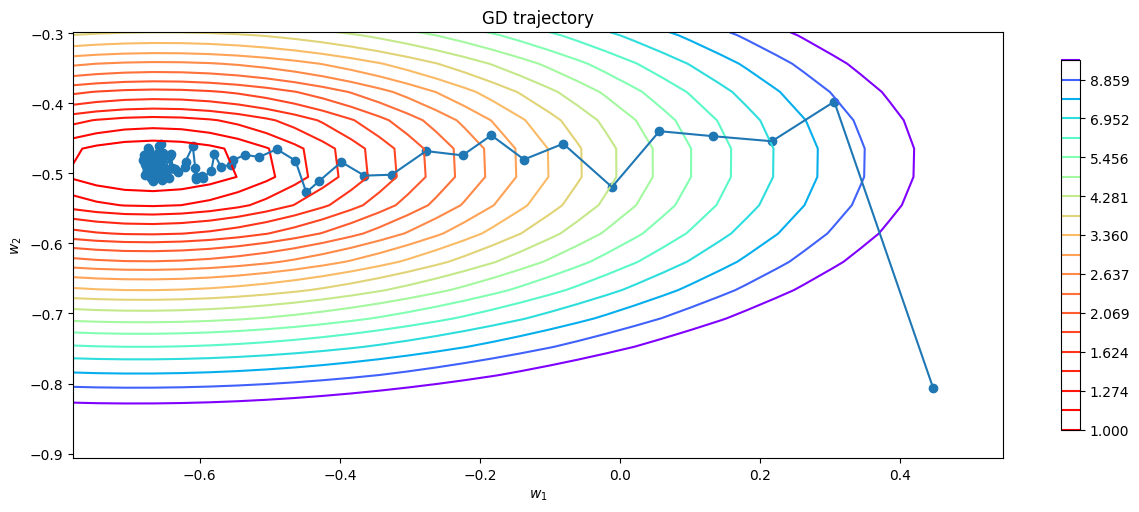


--------------  step = 0.0064 / batch_size = 150 --------------
First iteration loss: 12.047023242847978
Last iteration loss: 0.8671904707436348



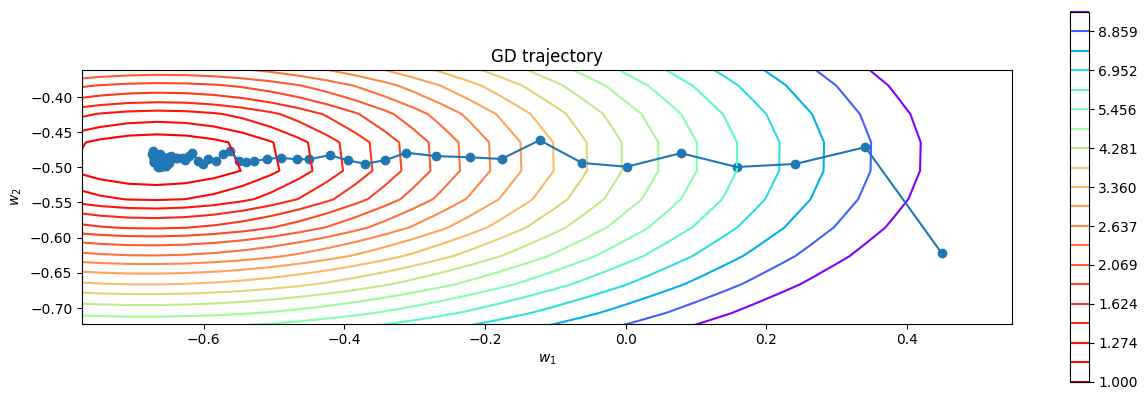


--------------  step = 0.0064 / batch_size = 300 --------------
First iteration loss: 11.697709593194563
Last iteration loss: 0.8670644525317386



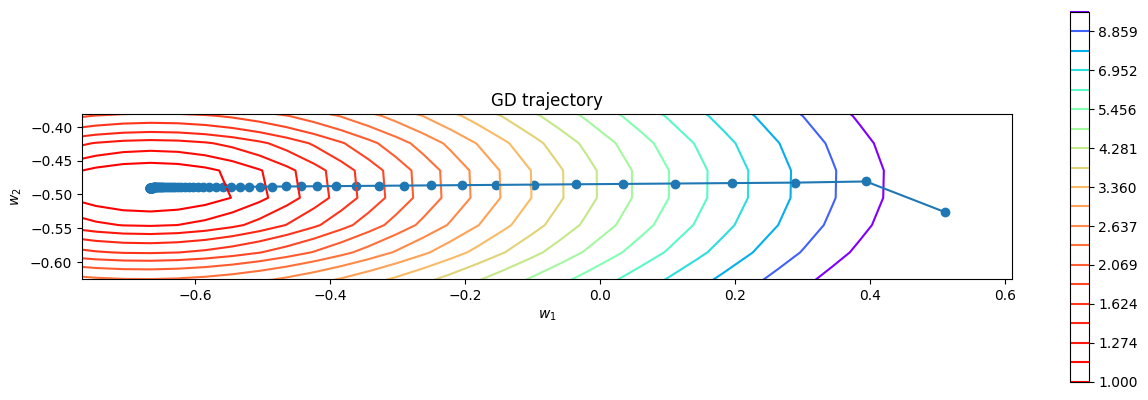


--------------  step = 0.0256 / batch_size = 5 --------------
First iteration loss: 8665.495463063688
Last iteration loss: 2.0676795147195072e+75



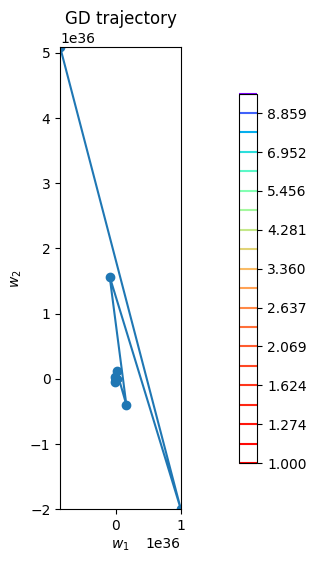


--------------  step = 0.0256 / batch_size = 10 --------------
First iteration loss: 579.4462679183723
Last iteration loss: 7.456880371325213e+98



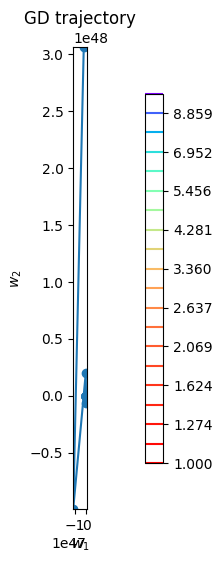


--------------  step = 0.0256 / batch_size = 50 --------------
First iteration loss: 4787.640767196019
Last iteration loss: 9.41395377874985e+99



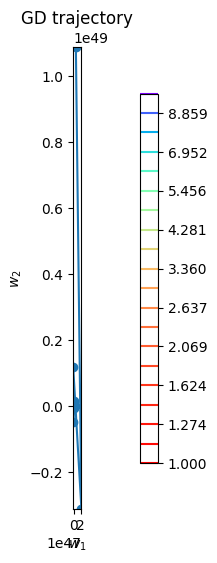


--------------  step = 0.0256 / batch_size = 150 --------------
First iteration loss: 3597.6337782972832
Last iteration loss: 5.669659951328457e+100



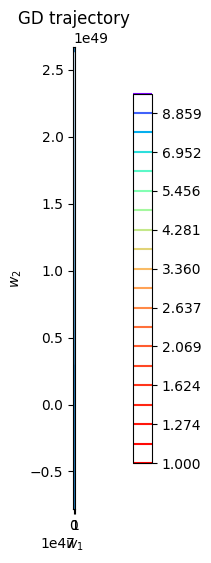


--------------  step = 0.0256 / batch_size = 300 --------------
First iteration loss: 3908.848836029217
Last iteration loss: 2.0371828879998253e+100



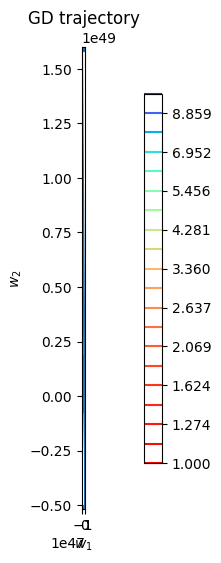

In [503]:
# как начальное значение возьмем 0.0001
lr = 0.0001
batch_sizes = [5, 10, 50, 150, 300]
loss = MSELoss()

np.random.seed(28)

# По заданию хорошие значения лежат в промежутке до 0.1, так и сделаем
while lr < 0.1:

    for batch_size in batch_sizes:
        # Красивый вывод
        print(f"\n--------------  step = {lr} / batch_size = {batch_size} --------------")
        # Считаем веса для итераций
        w_list = stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size, 100)
        # Выводим ошибку для первого элемента
        print("First iteration loss: " + str(loss.calc_loss(X, y, w_list[0])))
        # И для последнего (понятное дело, что для последнего должна быть лучше,
        # а если все хорошо, то вообще - почти самой лучшей)
        print("Last iteration loss: " + str(loss.calc_loss(X, y, w_list[-1])) + "\n")
        # Строим график
        plot_gd(w_list, X, y, loss)

    # Умножаем длину шага на 4 => и шагов у нас получится 5, и их значения будут
    # нескучными и не равномерными (то есть сможем увидеть интересные результаты)
    lr *= 4

Мы опять видим, что при шаге = 0.0001 и 0.0004 у нас слишком маленькие сдвиги каждый раз и мы не успеваем дойти до хороших значений ошибок. Однако мы явно видим, что в обычном градиентном спуске ошибка уменьшалась ровно и можно сказать по прямой линии, а при маленьких batch_size, эта прямая линия стала кривой (чем больше batch_size, тем прямее эта линия).

При шаге в 0.0016 явно видно, чем отличается стохастический спуск, от обычного, это опять же тот паттерн, что у нас ошибка не уменьшается всегда по прямой, а скачет вправо и влево при маленьких batch_size. Однако есть интересные результаты, при таком шаге и batch_size = 300 (почти вся выборка, в зависимости от рандома) ошибка хуже, чем при batch_size = 10: 0.9567716126790974 против 0.9472616231847015. Но на это полагаться совсем не стоит!

Шаг 0.0064 такой же как и предыдущий, а 0.0256 уже очень плох, слишком большое значение.

Основные отличия стохастического спуска от обычного, в том, что мы получаем результат за меньшее время. Соответственно тут явно видно, что если брать не всю выборку, а только половину, то результаты очень близки, а если брать еще меньше, то ошибка увеличивается, хотя и затрачиваемое время уменьшается. Так, например, везде хорошо себя показывает batch_size = 50: отличие от batch_size = 300 минимальное или ошибка даже лучше)


-----

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага.

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точнее этого минимума достичь и не "перепрыгнуть" его.

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

### **Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

Длина шага:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

In [504]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    p: float,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """

    # Изначально для удобства добавим начальный вектор весов для удобства
    result = [w_init]

    # Идем по итерациям
    for current_iteration in range(n_iterations):

        # Вычисляем случаные индексы
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        batch_x = X[batch_indices]
        batch_y = y[batch_indices]

        # Считаем текущий градиент, взяв предыдущие веса (они последние в нашем
        # массиве результатов) и в берем не всю выборку, а только случайно взятые
        # объекты
        current_gradient = loss.calc_grad(batch_x, batch_y, result[-1])

        # Вычисляем длину текущего шага
        current_lr = lr * ((1 / (1 + current_iteration)) ** p)
        # Умножаем градиент на длину шага
        current_gradient *= current_lr

        # В массив результатов записываем результат (предыдущие веса - то, что
        # мы получили)
        result.append(result[-1] - current_gradient)

    # Возвращаем массив ответов, убрав оттуда изначальные веса, чтобы в результате
    # получился список из n_iterations объектов
    return result[1:]

### **Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска


--------------  current p = 0.1 --------------
First iteration loss: 45.74635354219846
Last iteration loss: 0.9047947970396896



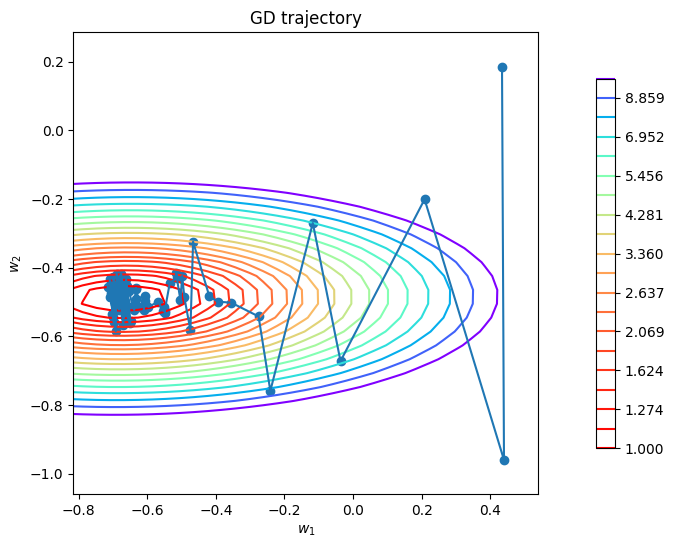


--------------  current p = 0.2 --------------
First iteration loss: 344.03590992181563
Last iteration loss: 0.9241182627312908



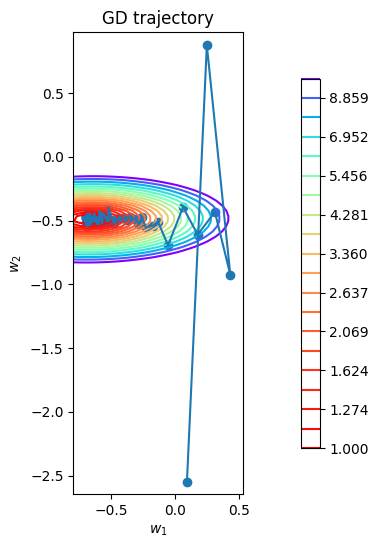


--------------  current p = 0.4 --------------
First iteration loss: 266.2094866992866
Last iteration loss: 0.8756056694596801



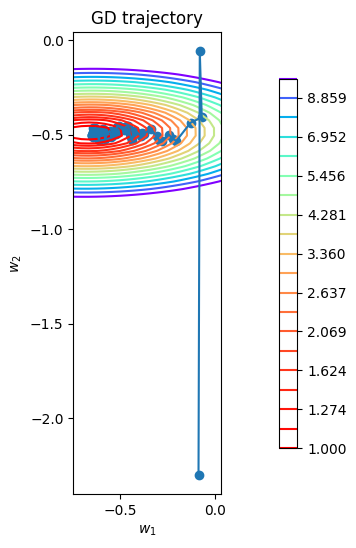


--------------  current p = 0.8 --------------
First iteration loss: 101.86031858237595
Last iteration loss: 1.3147944288980744



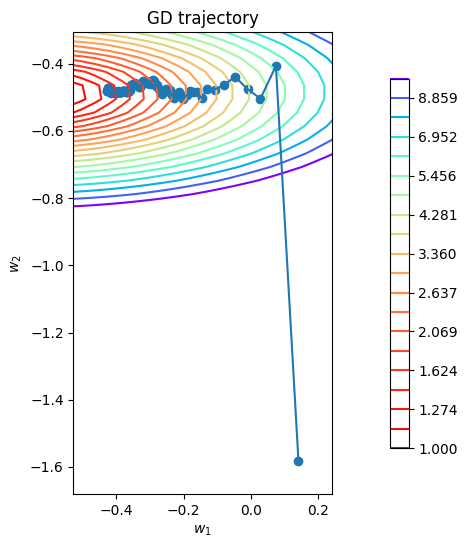

In [505]:
# как начальное значение возьмем 0.1
p = 0.1
loss = MSELoss()

np.random.seed(1228)

# По заданию хорошие значения лежат в промежутке до 0.1, так и сделаем
while p < 1:

    # Красивый вывод
    print(f"\n--------------  current p = {p} --------------")
    # Считаем веса для итераций
    w_list = stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, p, 100)
    # Выводим ошибку для первого элемента
    print("First iteration loss: " + str(loss.calc_loss(X, y, w_list[0])))
    # И для последнего (понятное дело, что для последнего должна быть лучше,
    # а если все хорошо, то вообще - почти самой лучшей)
    print("Last iteration loss: " + str(loss.calc_loss(X, y, w_list[-1])) + "\n")
    # Строим график
    plot_gd(w_list, X, y, loss)

    # Умножим p на 2, чтобы посмотреть различные значения p и их результаты
    p *= 2

Параметр p сильно влияет и на поведение стохастического спуска и на его результаты.

При p = 0.1 и p = 0.2 скачки отсаются слишком большими даже на послдних шагах. Из-за этого результат не всегда получается оптимальным.

А вот при p = 0.4 результат самый лучший для этого теста (0.8756056694596801), да и картинка хорошая, сначала большие прыжки с сильным уменьшением, а потом маленькие шаги, пытающиеся нащупать минимум.

При p = 0.8 спуск просто не успел дойти до хороших точек, так как уменьшение шага было слишком большим и шагов не хватило. Результат и график это показывают (1.3147944288980744).

### **Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

In [506]:
p = 0.4
batch_size = 10
lr = 0.0064

loss = MSELoss()

np.random.seed(1228)

# Сохраняем результаты
results_ordinary = []
results_stochastic = []

# Считаем веса для итераций
w_list = gradient_descent(w_init, X, y, loss, lr, 100)
w_list_stochastic = stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size, p, 100)

# Проходимся по всем итерациям
for index in range(len(w_list)):
    results_ordinary.append(loss.calc_loss(X, y, w_list[index]))
    results_stochastic.append(loss.calc_loss(X, y, w_list_stochastic[index]))


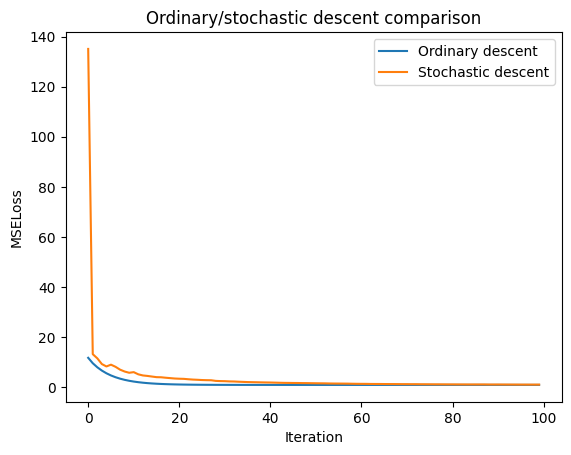

In [507]:
# Тут просто построим наглядный график
plt.xlabel("Iteration")
plt.ylabel("MSELoss")
plt.title("Ordinary/stochastic descent comparison")

plt.plot(range(len(w_list)), results_ordinary, label='Ordinary descent')
plt.plot(range(len(w_list)), results_stochastic, label='Stochastic descent')

plt.grid(visible=True, which='minor')
plt.legend()
plt.show()

Видно, что у нас на каждой итерации стохастический градиентный спуск проигрывает обычному. Это довольно понятно, так как по условию мы берем очень маленький batch_size, соответственно градиент для стохастического спуска строим по очень малому числу объектов, из-за этого он не всегда правильный.

Однако, это дает очень большой прирост в производительности и мы быстрее получаем результат, а как видно из графика, результаты ближе к 100-ой итерации очень близки!

Поэтому, можно сказать, что с первого взгляда SGD проигрывает, однако, на самом деле он показывает себя очень хорошо.

## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`

В методе `predict` мы будем применять нашу регрессию к датасету,

### **Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [508]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr

    def fit(self, X: np.ndarray, y: np.ndarray) -> "LinearRegression":
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        # наши веса это вектор весов из последней итерации gradient_descent
        # так что просто используем этот спуск с начальным вектором весов из
        # всех единичек
        all_weights = gradient_descent(np.ones(X.shape[1]), X, y, self.loss, self.lr, 10000)
        self.w = all_weights[-1]

        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        # результатом будет просто dot product от списка объектов на наш вектор
        # весов
        return np.dot(X, self.w)

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации.

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [509]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [510]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
    header=None,
    na_values=["?"],
)
X_raw = X_raw[~X_raw[25].isna()].reset_index()
X_raw.head()

,index,0,1,2,3,4,5,6,7,8,...,16,17,18,19,20,21,22,23,24,25
0,0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,3,2,164.0,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,4,2,164.0,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [511]:
# удалим дупликаты
X_raw.drop_duplicates()

y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)

### **Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

In [512]:
# Как мы видим, в данных есть ненужный столбец index, который не несет никакой полезной
# информации, удалим его.
X_raw.drop('index', axis=1, inplace=True)

In [513]:
# Разделим выборку на обучающую и тестовую

from sklearn.model_selection import train_test_split

# Делим наши данные на 2 выборки - train and test, выставляем долю тестовой
# выборки в 0.3
# Stratify мы не делаем, так как это регрессия
X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.3, random_state=12)

In [514]:
# Затем расправимся с пропусками, они есть
# Как мы видим есть 25 + 12 пропусков в признаке 1, который является вещественным
# (float64), 18 - 2 + 2 пропуска, 19 - 2 + 2, 21 - 2, 22 - 2 - это все числовые признаки
# И есть 2 пропуска в признаке 5, который является категориальным (object).
# В ответах пропусков нет.
print(f"Количество пропусков в ответах = {y_test.isna().sum() + y_train.isna().sum()}")
print(pd.DataFrame(zip(X_train.isna().sum(), X_test.isna().sum()), columns=["Количество пропусков Train", "Количество пропусков Test"]))
X_train.info()

Количество пропусков в ответах = 0
    Количество пропусков Train  Количество пропусков Test
0                            0                          0
1                           25                         12
2                            0                          0
3                            0                          0
4                            0                          0
5                            2                          0
6                            0                          0
7                            0                          0
8                            0                          0
9                            0                          0
10                           0                          0
11                           0                          0
12                           0                          0
13                           0                          0
14                           0                          0
15                           0       

In [515]:
# идея и код из семинарского ноутбука №6
# Для вещественных признаков возьмем вместо пропусков среднее задание
# Для категориальных - самый часто встречающийся

from sklearn.impute import SimpleImputer

# Создаем заполнители пропусков
mis_replacer = SimpleImputer(strategy="mean")
mis_replacer_cat = SimpleImputer(strategy="most_frequent")

# выделим отдельно категориальные признаки
cat_features_mask = (X_train.dtypes == "object").values

# Сначала сделаем все с train выборкой
X_train.columns = X_train.columns.astype(str)
# для вещественнозначных признаков заполним пропуски средними
X_train_real = X_train[X_train.columns[~cat_features_mask]]
X_train_real = pd.DataFrame(
    data=mis_replacer.fit_transform(X_train_real), columns=X_train_real.columns
)
# Для категориальных признаков заполним пропуски тем значением, которое
# встречается чаще
X_train_cat = X_train[X_train.columns[cat_features_mask]]
X_train_cat = pd.DataFrame(
    data=mis_replacer_cat.fit_transform(X_train_cat), columns=X_train_cat.columns
)
# Соединим столбцы с категориальными признаками и числовыми
X_train = pd.concat([X_train_real, X_train_cat], axis=1)


# Аналогично делем все с test выборкой
X_test.columns = X_test.columns.astype(str)
# для вещественнозначных признаков заполним пропуски средними
X_test_real = X_test[X_test.columns[~cat_features_mask]]
X_test_real = pd.DataFrame(
    data=mis_replacer.fit_transform(X_test_real), columns=X_test_real.columns
)
# Для категориальных признаков заполним пропуски тем значением, которое
# встречается чаще
X_test_cat = X_test[X_test.columns[cat_features_mask]]
X_test_cat = pd.DataFrame(
    data=mis_replacer_cat.fit_transform(X_test_cat), columns=X_test_cat.columns
)
# Соединим столбцы с категориальными признаками и числовыми
X_test = pd.concat([X_test_real, X_test_cat], axis=1)

In [516]:
# Все, пропуски ушли!
print(f"Количество пропусков в данных: {X_train.isna().sum().sum() + X_test.isna().sum().sum()}")

Количество пропусков в данных: 0


Закодируем категориальные признаки

Реализация частично взята с [сайта](https://www.geeksforgeeks.org/ml-one-hot-encoding/)

In [517]:
from sklearn.preprocessing import OneHotEncoder
categorical_columns = X_train.select_dtypes(include=['object']).columns.tolist()

# Инициализируем энкодер
encoder = OneHotEncoder(sparse_output=False, dtype=bool)

# Обучаем и применяем его к Train
one_hot_encoded = encoder.fit_transform(X_train[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Только применяем его к Test
one_hot_encoded_test = encoder.transform(X_test[categorical_columns])
one_hot_df_test = pd.DataFrame(one_hot_encoded_test, columns=encoder.get_feature_names_out(categorical_columns))

# Добавляем получившиеся столбцы к нашим
X_train = pd.concat([X_train, one_hot_df], axis=1)
X_test = pd.concat([X_test, one_hot_df_test], axis=1)

# Убираем столбцы, которые мы закодировали
X_train = X_train.drop(categorical_columns, axis=1)
X_test = X_test.drop(categorical_columns, axis=1)

In [518]:
# Отмасштабируем признаки
from sklearn.preprocessing import StandardScaler

# Опять сделаем маску, чтобы масштабировать только вещественные признаки, не
# трогая только что закодированные категориальные
cat_features_mask = (X_train.dtypes == "bool").values

# Обучаем Scaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train[X_train.columns[~cat_features_mask]])
# Затем, приводим вещественные признаки (и из обучающей, и из тестовой выборки)
# к тому же масштабу, явно изменяя столбцы на отмасштабированные
X_train[X_train.columns[~cat_features_mask]] = scaler.transform(X_train[X_train.columns[~cat_features_mask]])
X_test[X_train.columns[~cat_features_mask]] = scaler.transform(X_test[X_train.columns[~cat_features_mask]])

In [519]:
X_train

,0,1,9,10,11,12,13,16,18,19,...,15_twelve,15_two,17_1bbl,17_2bbl,17_4bbl,17_idi,17_mfi,17_mpfi,17_spdi,17_spfi
0,0.184214,1.042566e+00,1.062642,1.446686,2.499662,0.779414,0.481789,0.187538,-0.521361,0.467259,...,False,False,False,False,False,False,False,True,False,False
1,-1.378813,-8.547938e-01,1.583092,1.132552,1.353779,0.699621,0.889390,0.302290,1.627623,-0.332122,...,False,False,False,False,False,False,False,True,False,False
2,1.747241,4.279857e-16,-1.508066,-0.470338,-0.433799,-0.856358,0.317253,1.518665,1.481930,-1.131504,...,False,False,False,False,False,False,False,True,False,False
3,-0.597300,-1.155962e+00,-0.340996,-0.091766,-0.250457,0.460239,0.119062,-0.455075,1.044848,-1.962860,...,False,False,False,False,False,False,False,True,False,False
4,-0.597300,-1.155962e+00,-0.404081,0.053219,-1.579682,0.141064,-0.400723,-0.409174,-0.667054,1.042813,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,0.965727,1.223267e+00,0.116369,0.149875,0.116225,0.220858,-0.466163,-0.432125,-0.521361,0.467259,...,False,False,False,False,False,False,False,True,False,False
136,1.747241,8.016311e-01,0.005971,0.955348,0.253731,0.939002,0.225636,-0.156719,-2.888885,-3.785449,...,False,False,False,False,False,False,False,True,False,False
137,0.965727,-1.216196e+00,-0.845675,-1.436905,-1.167164,-0.018524,-1.002776,-0.707530,1.044848,-2.858167,...,False,False,False,True,False,False,False,False,False,False
138,-0.597300,-9.752611e-01,-0.530251,-0.679761,-0.708811,-0.377596,-0.582087,-0.409174,-0.229973,0.307382,...,False,False,False,False,False,True,False,False,False,False


In [531]:
X_test

,0,1,9,10,11,12,13,16,18,19,...,15_twelve,15_two,17_1bbl,17_2bbl,17_4bbl,17_idi,17_mfi,17_mpfi,17_spdi,17_spfi
0,0.184214,0.741397,-0.845675,-1.404686,-0.983823,-1.255327,-1.157963,-0.868183,-1.322677,-0.076320,...,False,False,False,True,False,False,False,False,False,False
1,0.965727,-0.884911,-0.277911,-0.244806,-0.204622,0.779414,-0.582087,-0.432125,-0.521361,0.467259,...,False,False,False,False,False,False,False,True,False,False
2,-1.378813,-1.758298,0.526420,0.069328,0.253731,0.460239,-0.322194,-0.133768,-0.084279,0.914912,...,False,False,False,False,False,False,False,True,False,False
3,0.184214,-0.162107,-0.845675,-1.404686,-0.983823,-1.175534,-1.328108,-0.868183,-1.322677,-0.076320,...,False,False,False,True,False,False,False,False,False,False
4,-0.597300,-0.139366,0.920701,0.021000,0.070390,0.260755,0.212548,0.141637,0.352802,1.234665,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.184214,-0.674093,-0.845675,-1.992681,-0.892152,-0.457389,-1.178530,-0.822282,-1.541217,0.499234,...,False,False,True,False,False,False,False,False,False,False
57,-0.597300,-1.396897,-0.530251,-0.405901,-1.075493,2.135909,-0.572738,-0.822282,-1.031289,-0.715825,...,False,False,False,True,False,False,False,False,False,False
58,-0.597300,-0.139366,0.699904,1.535288,0.895426,-0.018524,1.483964,1.862922,1.044848,0.435283,...,False,False,False,False,False,False,False,True,False,False
59,-1.378813,-0.854794,1.583092,1.132552,1.353779,0.699621,0.683720,0.302290,1.627623,-0.332122,...,False,False,False,False,False,False,False,True,False,False


### **Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [520]:
from sklearn.metrics import mean_squared_error

linear_regression = LinearRegression(MSELoss())

# Обучаем на обучающей выборке
linear_regression.fit(X_train, y_train)
# Проверим, что все работает сделаем предикт для обучающей и посчитаем MSE
y_train_predicted = linear_regression.predict(X_train)

print(f"MSE на обучающей выборке {mean_squared_error(y_train, y_train_predicted):.2f}")

MSE на обучающей выборке 1376598.95


### **Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [521]:
from sklearn.metrics import mean_squared_error

# Делаем предикт для обеих выборок
y_train_predicted = linear_regression.predict(X_train)
y_test_predicted = linear_regression.predict(X_test)

# Считаем MSE
print(f"MSE на обучающей выборке {mean_squared_error(y_train, y_train_predicted):.2f}")
print(f"MSE на тестовой выборке {mean_squared_error(y_test, y_test_predicted):.2f}")

MSE на обучающей выборке 1376598.95
MSE на тестовой выборке 7721849.57


Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

### **Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`

Он должен вычислять лосс и градиент по формулам наверху

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`

Формула функции потерь для MSE с L2 регуляризацией в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

In [522]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.0):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """

        # Просто перепишем формулы в код
        # Убираем последний элемент из весов, так как он отвечает за константный
        # признак
        w_correct = w
        w_correct[-1] = 0

        # Считаем по формуле
        dot_product = np.linalg.norm(np.dot(X, w) - y) ** 2
        result = (1 / y.size) * dot_product + self.coef * (np.linalg.norm(w_correct) ** 2)

        return result


    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """

        # Просто перепишем формулы в код
        # Зануляем последний элемент из весов, так как он отвечает за константный
        # признак
        w_correct = w
        w_correct[-1] = 0

        # Считаем по формуле
        dot_product = np.dot(X, w) - y
        result = (2 / y.size) * np.dot(X.T, dot_product) + 2 * self.coef * w_correct

        return result

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [523]:
linear_regression = LinearRegression(MSEL2Loss(0.1))

### **Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации.

**OLD RESULTS**

- MSE на обучающей выборке 1376598.95
- MSE на тестовой выборке 7721849.57

In [524]:
from sklearn.metrics import mean_squared_error

for coef in [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]:

    linear_regression = LinearRegression(MSEL2Loss(coef))

    # Обучим нашу линейную регрессию на обучающей выборке
    linear_regression.fit(X_train, y_train)

    # Делаем предикт для обеих выборок
    y_train_predicted = linear_regression.predict(X_train)
    y_test_predicted = linear_regression.predict(X_test)

    # Считаем MSE
    print(f"\n============ coef = {coef} ============")
    print(f"MSE на обучающей выборке {mean_squared_error(y_train, y_train_predicted):.2f}")
    print(f"MSE на тестовой выборке {mean_squared_error(y_test, y_test_predicted):.2f}")


============ coef = 1e-05 ============
MSE на обучающей выборке 1376867.53
MSE на тестовой выборке 7735905.71

============ coef = 0.0001 ============
MSE на обучающей выборке 1378278.82
MSE на тестовой выборке 7714687.11

============ coef = 0.001 ============
MSE на обучающей выборке 1423591.68
MSE на тестовой выборке 7655306.08

============ coef = 0.01 ============
MSE на обучающей выборке 2196193.46
MSE на тестовой выборке 9087482.52

============ coef = 0.1 ============
MSE на обучающей выборке 5449658.15
MSE на тестовой выборке 13770641.20

============ coef = 1 ============
MSE на обучающей выборке 16931139.76
MSE на тестовой выборке 26567615.32


Ура! Мы получили совсем маленькое но улучшение ошибки на тесте с помощью L2 регуляризации, при коэффициенте регуляризации равном 0.001.

    Тестовая выборка
    С MSE       = 7721849.57
    C MSEL2Loss = 7655306.08

    Обучающая выборка
    С MSE       = 1376598.95
    C MSEL2Loss = 1423591.68

Как можно заметить, мы выигрываем по тестовой выборке, но проигрываем по обучающей. Однако это больше положительное влияние, чем отрицательное - переобучение становится менее выражено.

----

В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

### **Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`

Он должен вычислять лосс и градиент по формулам наверху

Функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

In [525]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps

    def phi_func(self, z: float) -> float:
        if -self.eps < z < self.eps:
            return (1 / 2) * z * z
        return self.eps * (abs(z) - 1 / 2 * self.eps)


    def phi_func_grad(self, z: float) -> float:
        if -self.eps < z < self.eps:
            return z
        return self.eps * np.sign(z)

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """

        # Просто перепищем формулу в код
        return (1 / y.size) * np.sum(np.apply_along_axis(self.phi_func, 1, np.dot(X, w) - y))

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """

        # И тут тоже
        help = np.dot(X, w) - y
        result = np.vectorize(self.phi_func_grad)(help)
        # Для того чтобы код остался читаемым, здесь был оставлен цикл, иначе тут
        # нужно применять знания и трюки из линейной алгебры, которые очень плохо
        # читаемы
        result = [X[index] * result[index] for index in range(y.size)]
        return np.sum(result, axis=0) / y.size

### **Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

**MSELoss**

- MSE на обучающей выборке 1376598.95
- MSE на тестовой выборке 7721849.57

MSEL2Loss

- MSE на обучающей выборке 1423591.68
- MSE на тестовой выборке 7655306.08

In [526]:
from sklearn.metrics import mean_squared_error

for eps in [1000, 2000, 3000, 4000, 5000, 7000]:

  linear_regression = LinearRegression(HuberLoss(eps))

  # Обучим нашу линейную регрессию на обучающей выборке
  linear_regression.fit(X_train, y_train)

  # Делаем предикт для обеих выборок
  y_train_predicted = linear_regression.predict(X_train)
  y_test_predicted = linear_regression.predict(X_test)

  # Считаем MSE
  print(f"\n============ eps = {eps} ============")
  print(f"MSE на обучающей выборке {mean_squared_error(y_train, y_train_predicted):.2f}")
  print(f"MSE на тестовой выборке {mean_squared_error(y_test, y_test_predicted):.2f}")


============ eps = 1000 ============
MSE на обучающей выборке 1533229.83
MSE на тестовой выборке 8560946.31

============ eps = 2000 ============
MSE на обучающей выборке 1443539.84
MSE на тестовой выборке 8007969.53

============ eps = 3000 ============
MSE на обучающей выборке 1412716.08
MSE на тестовой выборке 7759876.63

============ eps = 4000 ============
MSE на обучающей выборке 1390280.72
MSE на тестовой выборке 7660960.30

============ eps = 5000 ============
MSE на обучающей выборке 1383562.11
MSE на тестовой выборке 7700830.10

============ eps = 7000 ============
MSE на обучающей выборке 1383388.45
MSE на тестовой выборке 7697213.31


HuberLoss очень хорошо себя показал на обеих выборках:

Значение ошибки на тестовой выборке уменьшилось, по сравнению с MSE, и даже с MSEL2Loss. При epsilon = 4000 самые лучшие результаты:

                       HuberLoss    MSELoss    MSEL2Loss
    Обучающая выборка  1390280.72  1376598.95  1423591.68
    Тестовая выборка   7660960.30  7721849.57  7655306.08

    То есть, ошибка на обучающей выборке лучше чем у MSE с L2 регуляризацией, но чуть хуже, чем у обычного MSE.
    (Модель не так сильно подогналась под обучающую выборку)

    А также ошибка на тестовой выборке меньше чем у MSELoss и чуть-чуть не дотягивает до MSEL2Loss

Как факт, заметим, что при увеличении epsilon, ошибка на обучающей выборке уменьшается, а на тестовой растет, что явно показывает переобучение.

В заключение, можно заметить, что с изначальной проблемой переобучения и выбросов HuberLoss справился хорошо)

**Задание 3 (0.08/8 балла)**

Вставьте ваш любимый мем 2021 в ячейку ниже: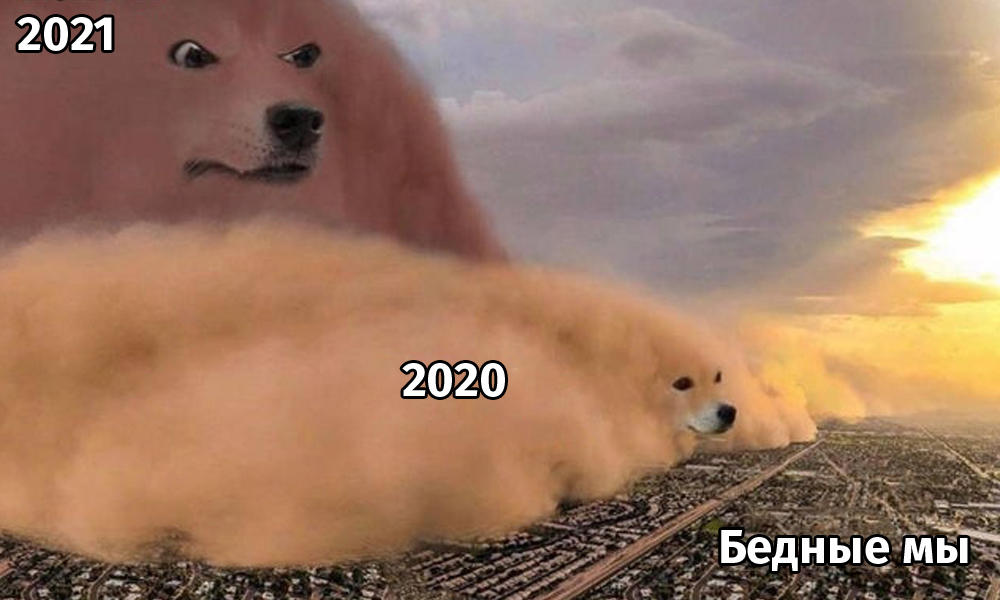

## БОНУС (2.5 баллов)

Градиентный спуск — далеко не единственный метод оптимизации.
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2.5 баллов)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии.

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределением с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

----
Хорошо, напишем функцию, аналогично функции gradient_descent, взяв инфу с [википедии](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0) и лекций.

In [527]:
def simulated_annealing(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    start_temperature: float,
    n_iterations: int = 100000,
) -> List[np.ndarray]:
    """
    Функция имитации отжига
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_loss(X, y, w)
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """

    # Изначально для удобства добавим начальный вектор весов для удобства
    result = [w_init]
    # Так же заведем массив лосов, чтобы сократить количество операций и не
    # считать каждый лосс дважды
    losses = [loss.calc_loss(X, y, w_init)]

    # В алгоритме имитации отжига есть температура - параметр, отвечающий за то
    # возьмем мы точку, значение ошибки в которой больше чем в текущей или не
    # возьмем.
    temperature = start_temperature

    # Идем по итерациям
    for current_iteration in range(n_iterations):

        # Вычисляем следующие веса, исходя из предыдущих, возьмем случайное
        # распределение и умножим его на 100, чтобы разница в весах была больше
        new_w = result[-1] + np.random.standard_t(3, size=w_init.shape) * 100

        # Вычисляем значение нового лоса (для новых весов)
        new_loss = loss.calc_loss(X, y, new_w)
        delta_loss = new_loss - losses[-1]

        # Считаем переменную вероятности по формуле из википедии, только тут она
        # не лежит в интервале [0, 1], из-за разного значения температуры.
        proba = np.exp(-delta_loss / temperature)

        # Это просто, если веса оказались лучше (delta_loss < 0), то мы берем
        # точку, также мы ее берем, если вероятность оказалась > 1
        if delta_loss < 0 or proba >= 1:
            losses.append(new_loss)
            result.append(new_w)

            # Уменьшаем температуру
            temperature *= 0.98
        else:
            # Иначе - просто перезаписываем в результат последние веса и лосс,
            # чтобы график построился красиво
            losses.append(losses[-1])
            result.append(result[-1])

    # Возвращаем массив ответов, убрав оттуда изначальные веса, чтобы в результате
    # получился список из n_iterations объектов
    return result[1:]

In [528]:
import warnings
warnings.filterwarnings('ignore')

# Задаем количество итераций и начальные веса
n_iterations = 1000
w_init = np.ones(X_train.shape[1])

loss = MSELoss()

np.random.seed(1228)

# Сохраняем результаты
results_ordinary = []
results_simulated_annealing = []

# Будем рассматривать все это на одном из предыдущих датасетов: X_train, y_train
# Считаем веса для итераций
w_list = gradient_descent(w_init, X_train, y_train, loss, lr, n_iterations)
w_list_simulated_annealing = simulated_annealing(w_init, X_train, y_train, loss, 100, n_iterations)

# Проходимся по всем итерациям и вычисляем значения MSE
for index in range(len(w_list)):
    results_ordinary.append(loss.calc_loss(X_train, y_train, w_list[index]))
    results_simulated_annealing.append(loss.calc_loss(X_train, y_train, w_list_simulated_annealing[index]))

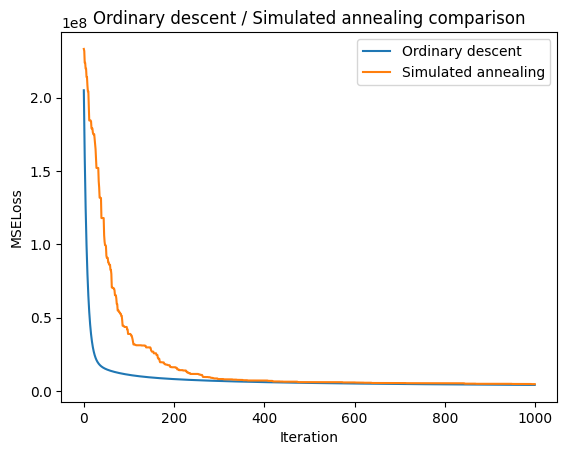

In [529]:
# Тут просто построим наглядный график
plt.xlabel("Iteration")
plt.ylabel("MSELoss")
plt.title("Ordinary descent / Simulated annealing comparison")

plt.plot(range(len(w_list)), results_ordinary, label='Ordinary descent')
plt.plot(range(len(w_list)), results_simulated_annealing, label='Simulated annealing')

plt.grid(visible=True, which='minor')
plt.legend()
plt.show()

In [530]:
print(f"Final loss на Алгоритме имитации отжига:     {results_simulated_annealing[-1]:.2f}")
print(f"Final loss на Градиентном спуске с MSELoss:  {results_ordinary[-1]:.2f}")

Final loss на Алгоритме имитации отжига:     4622354.41
Final loss на Градиентном спуске с MSELoss:  4084485.51


Как мы видим, алгоритм имитации отжига очень интересно работает и почти доходит до значений Градиентного спуска. Эта разница станет гораздо меньше, если подобрать нужные параметры.

А параметрами в имитации отжига являются: функция нахождения следующего соседа (следующих весов), начальная температура, функция убавления температуры, вероятно есть еще, но эти наиболее заметны в моей функции.

Этими же параметрами мы регулируем то, насколько быстро Отжиг улучшает ошибку (приближается к синему графику).

Вообще, основным плюсом имитации отжига является возможность найти не один локальный минимум (как Gradient descent), а лучший из локальных минимумов, близкий к глобальному.